## Problema de Regressão - Imóveis parte I

- Você é encarregado de construir um modelo preditivo para prever o preço de imóveis com base em diversas variáveis, como área construída, número de quartos, idade do imóvel, e localização (representada por coordenadas geográficas). Os dados já estão pré-processados e disponíveis em um arquivo CSV.

### Você deve seguir os seguintes passos para resolver a questão:

1. Carregamento dos dados: 
- Use o arquivo imoveis.csv, que contém as colunas: area_construida, n_quartos, idade_imovel, latitude, longitude, e preco.


2. Algoritmos de Regressão:
- Utilize dois algoritmos de regressão: Regressão Linear e Regressão de Floresta Aleatória (Random Forest), ambos disponíveis no scikit-learn. Realize uma regressão múltipla utilizando ambos os algoritmos ao mesmo tempo, comparando os resultados.


3. Validação e Métricas:
- Divida os dados em conjuntos de treino (80%) e teste (20%).
- Avalie os dois modelos utilizando as seguintes métricas:
- Erro Médio Absoluto (MAE)
- Erro Quadrático Médio (MSE)
- R² Score
- Erro Relativo Absoluto (RAE)


4. Comparação e Interpretação:
- Compare os resultados das métricas de cada modelo. Indique qual modelo obteve melhor desempenho em cada métrica e explique o motivo. Para inovar no resultado final, combine as previsões dos dois modelos, criando um ensemble de predições, onde o resultado final é a média ponderada das previsões dos dois modelos (dê peso maior ao modelo que apresentou melhor desempenho).

5. Perguntas:
    - Qual dos dois algoritmos apresentou melhor desempenho geral?
    - O ensemble proposto, baseado na média ponderada, foi capaz de melhorar as métricas de predição? Se sim, em qual métrica ele se destacou?


Código:
Implemente o código Python para realizar as tarefas mencionadas, mostrando os passos detalhados de cada métrica e a geração dos resultados do ensemble.

Desenvolvedor: Lucca de Sena Barbosa

Curso: Ciências da Computação - 3º período

In [91]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from geopy.distance import geodesic

1. Carregamento dos dados: 
- Esses dados foram coletados de maneira artificial pela IA deepseak a fins acadêmicos. Portanto, os modelos não podem ser utilizados no contexto real.

In [ ]:
np.random.seed(42)
n = 5000
centro = (-23.5505, -46.6333)  # Centro de SP

# Gerar dados sintéticos
data = {
    'area_construida': np.clip(np.random.lognormal(4.2, 0.3, n), 30, 500),
    'num_quartos': np.random.choice([1,2,3,4], p=[0.2,0.5,0.2,0.1], size=n),
    'num_banheiros': np.random.choice([1,2,3], p=[0.4,0.5,0.1], size=n),
    'idade_imovel': np.random.randint(0, 50, n),
    'latitude': np.random.uniform(-23.58, -23.53, n),
    'longitude': np.random.uniform(-46.68, -46.61, n)
}

df = pd.DataFrame(data)

# Engenharia de features geográficas
df['distancia_centro'] = df.apply(lambda x: geodesic(centro, (x['latitude'], x['longitude'])).km, axis=1)

# Gerar preço com relações não-lineares
df['preco'] = (
    df['area_construida'] * 3500 * (1 - df['idade_imovel']/100) +
    df['num_quartos'] * 80000 +
    df['num_banheiros'] * 50000 +
    np.exp(-df['distancia_centro']/10) * 1000000 +
    np.random.normal(0, 50000, n)
).astype(int)

# Salvar dataset
df.to_csv('imoveis.csv', index=False)

In [92]:
db = pd.read_csv("imoveis.csv")
db

,area_construida,num_quartos,num_banheiros,idade_imovel,latitude,longitude,distancia_centro,preco
0,77.402126,1,1,47,-23.549278,-46.656657,2.388699,1132546
1,63.976812,1,1,1,-23.570599,-46.627266,2.309640,1131616
2,80.988451,2,2,15,-23.532817,-46.661013,3.441348,1047834
3,105.310061,2,2,15,-23.559521,-46.635911,1.034092,1431188
4,62.162628,2,1,21,-23.578726,-46.678279,5.555068,960997
...,...,...,...,...,...,...,...,...
4995,65.713901,1,2,6,-23.531026,-46.642340,2.346011,1102602
4996,82.551569,3,2,24,-23.562271,-46.619909,1.889119,1395420
4997,169.673001,3,3,15,-23.530573,-46.667647,4.143791,1510439
4998,84.979568,1,2,21,-23.532158,-46.661383,3.514146,1098012


In [93]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area_construida   5000 non-null   float64
 1   num_quartos       5000 non-null   int64  
 2   num_banheiros     5000 non-null   int64  
 3   idade_imovel      5000 non-null   int64  
 4   latitude          5000 non-null   float64
 5   longitude         5000 non-null   float64
 6   distancia_centro  5000 non-null   float64
 7   preco             5000 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 312.6 KB


<Axes: >

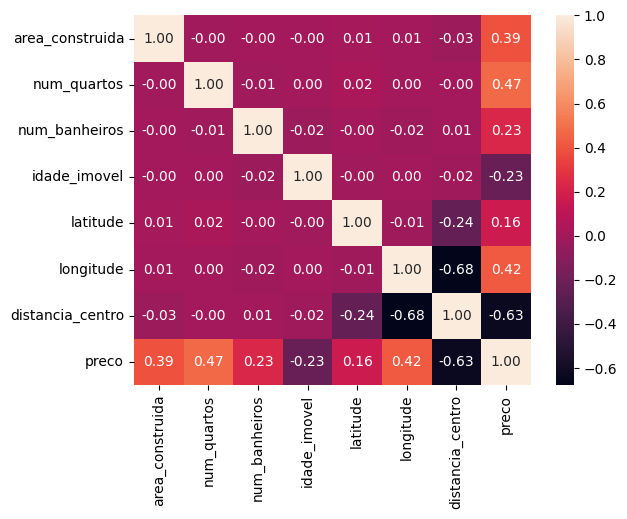

In [94]:
plt.Figure(figsize=(10, 7))
sn.heatmap(db.corr(), annot=True, fmt='.2f')

In [146]:
x_values = db.iloc[:, 0:7].values
y_values = db.iloc[:, 7].values

x_values, y_values

(array([[ 77.40212584,   1.        ,   1.        , ..., -23.54927755,
         -46.65665749,   2.38869903],
        [ 63.97681228,   1.        ,   1.        , ..., -23.57059874,
         -46.62726618,   2.30964017],
        [ 80.98845077,   2.        ,   2.        , ..., -23.5328175 ,
         -46.66101339,   3.44134815],
        ...,
        [169.67300085,   3.        ,   3.        , ..., -23.5305727 ,
         -46.66764706,   4.14379097],
        [ 84.97956848,   1.        ,   2.        , ..., -23.53215832,
         -46.66138303,   3.51414622],
        [ 51.70633566,   2.        ,   3.        , ..., -23.5480084 ,
         -46.61412467,   1.9772102 ]], shape=(5000, 7)),
 array([1132546, 1131616, 1047834, ..., 1510439, 1098012, 1243361],
       shape=(5000,)))

### 2. Algoritmos de Regressão:
- Para este problema de Regressão, iremos utilizar os seguintes modelos:
1. Linear Regression;
2. Random Forest Regressor;

### 3. Validação e Métricas:
- Divida os dados em conjuntos de treino (80%) e teste (20%).



In [149]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((4000, 7), (1000, 7), (4000,), (1000,))

In [119]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [151]:
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)
model_linear.score(x_train, y_train)

0.8759422787067392

In [152]:
predict_linear = model_linear.predict(x_test)
predict_linear

array([1181212.03749556, 1172379.9299848 , 1126589.1073658 ,
       1283926.87694124, 1361908.66732198,  988977.86383152,
       1512113.76496598, 1452864.49246119, 1225089.74958449,
       1111369.20504095, 1186380.16712669, 1342338.36201182,
       1223364.16800459,  964026.08038757, 1262010.02777228,
       1131492.02669252, 1201161.25045399, 1146265.98163793,
       1029682.42465604, 1384390.71655321, 1139012.30500957,
       1329595.19388888, 1158164.81892714, 1338450.92185493,
       1225395.17767552, 1368273.35329093, 1171550.9769984 ,
       1206652.04843999, 1457904.57683068, 1226192.2970465 ,
       1253216.18797515, 1230762.68838437, 1172341.38796118,
       1214177.90605862, 1458809.49322728,  946110.83900068,
        862105.24223368, 1254174.98458733, 1201818.47020832,
       1060302.08072798, 1456252.81009644, 1220852.7401731 ,
       1202140.03154947, 1264899.96828981, 1110271.73580534,
       1262945.61576701, 1026764.5739103 ,  979236.56977398,
       1253461.6944196 ,

In [153]:
model_random = RandomForestRegressor()
model_random.fit(x_train, y_train)
model_random.score(x_train, y_train)

0.9776186411338109

In [154]:
predict_random = model_random.predict(x_test)
predict_random

array([1168320.35, 1180319.61, 1109519.5 , 1259768.59, 1359445.99,
       1033902.79, 1455710.76, 1331905.41, 1245387.15, 1109098.35,
       1218587.5 , 1370394.86, 1244902.17, 1010788.56, 1267073.52,
       1128969.17, 1202459.14, 1173616.82, 1048398.06, 1394662.13,
       1107378.06, 1294150.91, 1158602.83, 1353818.3 , 1231269.93,
       1380743.89, 1187482.18, 1224658.44, 1477629.81, 1188187.63,
       1275401.91, 1250157.99, 1151969.38, 1209941.55, 1443786.41,
        967179.19,  913144.68, 1206440.32, 1237612.26, 1071353.92,
       1413437.64, 1223194.94, 1220280.67, 1242273.24, 1096711.08,
       1269770.99, 1055768.99, 1011990.01, 1237360.24, 1460921.38,
       1183122.45, 1079412.9 , 1064117.27, 1168826.31, 1334568.65,
       1323990.31, 1089751.51, 1411011.01, 1485622.61, 1134802.95,
       1178058.46, 1230354.98, 1283450.96, 1290227.41, 1212738.49,
       1061035.69, 1043060.49, 1086111.98, 1267636.59, 1176983.82,
       1291169.56, 1331588.46, 1158191.83, 1072232.74, 1033239

- Avalie os dois modelos utilizando as seguintes métricas:
- Erro Médio Absoluto (MAE)
- Erro Quadrático Médio (MSE)
- R² Score
- Erro Relativo Absoluto (RAE)

In [156]:
print("Métricas do Modelo de Regressão Linear: ")
print(f"- Mean Squared Erro (MSE): {mean_squared_error(predict_linear, y_test)}")
print(f"- Mean Absolute Erro (MAE): {mean_absolute_error(predict_linear, y_test)}")
print(f"- R² Score: {r2_score(predict_linear , y_test)}")
 

Métricas do Modelo de Regressão Linear: 
- Mean Squared Erro (MSE): 2828279195.7831464
- Mean Absolute Erro (MAE): 42289.4771160675
- R² Score: 0.8561015266406732


In [157]:
graph1 = px.scatter(x=y_test, y=predict_linear)
graph1

In [158]:
print("Métricas do Modelo de Regressão de Floresta Aleatória: ")
print(f"- Mean Squared Erro (MSE): {mean_squared_error(predict_random, y_test)}")
print(f"- Mean Absolute Erro (MAE): {mean_absolute_error(predict_random, y_test)}")
print(f"- R² Score: {r2_score(predict_random , y_test)}")

Métricas do Modelo de Regressão de Floresta Aleatória: 
- Mean Squared Erro (MSE): 3397921006.4967723
- Mean Absolute Erro (MAE): 46683.53712
- R² Score: 0.8066688553370851


In [159]:
graph1 = px.scatter(x=y_test, y=predict_random)
graph1

In [184]:
wA = 0.90
wB = 1 - wA
ensemble_predict = (wA * predict_linear) + (wB * predict_random)
ensemble_predict

array([1179922.86874601, 1173173.89798632, 1124882.14662922,
       1281511.04824712, 1361662.39958979,  993470.35644837,
       1506473.46446938, 1440768.58421507, 1227119.48962604,
       1111142.11953686, 1189600.90041402, 1345144.01181064,
       1225517.96820413,  968702.32834882, 1262516.37699505,
       1131239.74102327, 1201291.03940859, 1149001.06547414,
       1031553.98819044, 1385417.85789789, 1135848.88050861,
       1326050.76549999, 1158208.62003443, 1339987.65966944,
       1225982.65290797, 1369520.40696183, 1173144.09729856,
       1208452.68759599, 1459877.10014761, 1222391.83034185,
       1255434.76017763, 1232702.21854594, 1170304.18716506,
       1213754.27045276, 1457307.18490455,  948217.67410061,
        867209.18601032, 1249401.5181286 , 1205397.84918749,
       1061407.26465518, 1451971.2930868 , 1221086.96015579,
       1203954.09539452, 1262637.29546083, 1108915.67022481,
       1263628.15319031, 1029665.01551927,  982511.91379659,
       1251851.54897764,

In [185]:
print("Métricas do Modelo Ensemble: ")
print(f"- Mean Squared Erro (MSE): {mean_squared_error(ensemble_predict, y_test)}")
print(f"- Mean Absolute Erro (MAE): {mean_absolute_error(ensemble_predict, y_test)}")
print(f"- R² Score: {r2_score(ensemble_predict , y_test)}")

Métricas do Modelo Ensemble: 
- Mean Squared Erro (MSE): 2806487714.701809
- Mean Absolute Erro (MAE): 42182.91894625987
- R² Score: 0.8550988980159592


<table style='justify-content:center'>
    <tr>
        <th>Model</th>
        <th>MSE</th>
        <th>MAE</th>
        <th>R²</th>
    </tr>
    <tr>
        <td>Random Forest</td>
        <td>3311317142</td>
        <td>45449</td>
        <td>0.80</td>
    </tr>
    <tr>
        <td>Regressão Linear</td>
        <td>2653397233</td>
        <td>41434</td>
        <td>0.85</td>
    </tr>
    <tr>
        <td>Ensemble</td>
        <td>2806487714</td>
        <td>42182</td>
        <td>0.85</td>
    </tr>
</table>

- Qual dos dois algoritmos apresentou melhor desempenho geral?
Resposta: Regressão Linear apresentou um bom desempenho, tendo em vista que obteve um menor MSE e MAE em relação ao Random Forest. Já, o R² maior
- O ensemble proposto, baseado na média ponderada, foi capaz de melhorar as métricas de predição? Se sim, em qual métrica ele se destacou?
Resposta: Nesta primeira análise, o método ensemble não aprensentou resultados melhores do que o Linear Regression, porém em comparação com o Random Forest, pode-se dizer que ele apresenta superioridade.